# Using Docta's preference data cleaning

## READ before use:
1. This API cleans text data with scores ranging from [0,1].
2. Tips for a better performance:
    - More data
    - Reasonable label values ranging from [0,1].
3. Ensure you have a docta.ai account which can be registered at [app.docta.ai](app.docta.ai). Following the instruction below.
4. Price: $3 / 1M tokens
5. You will receive an Email contains the download link of the data when the process is completed. The process may take long so please make sure you are not sending multiple requests at a time.


--------------
Get your API key and user ID at: https://app.docta.ai/

1. Create an account.

2. Find your API ket and user ID and reload if necessary.

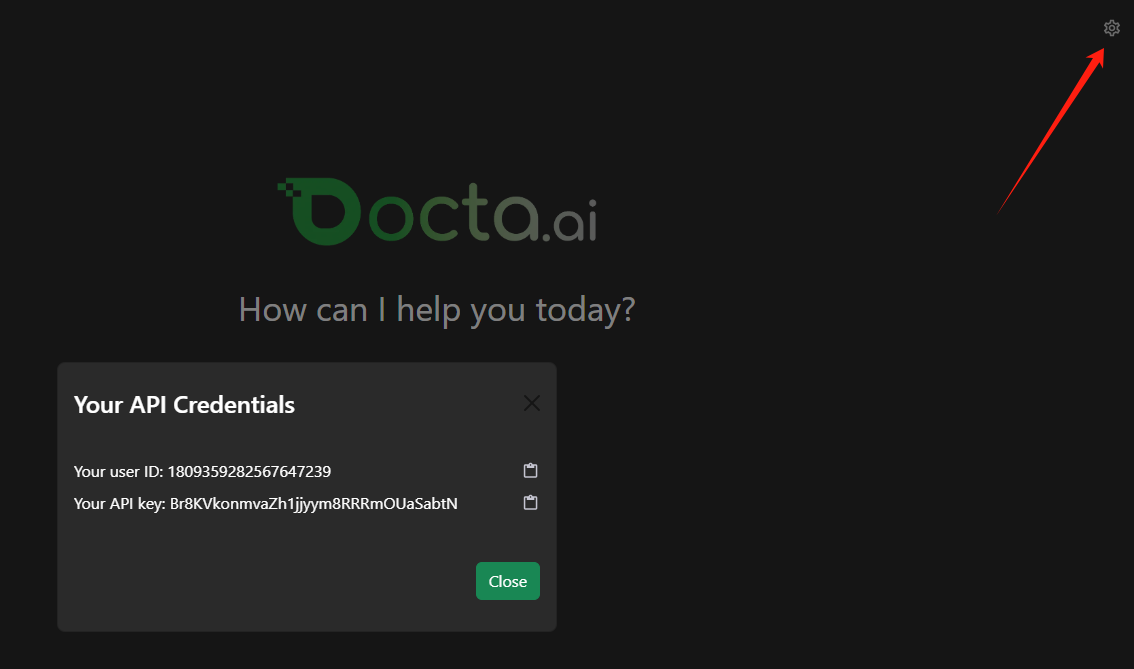
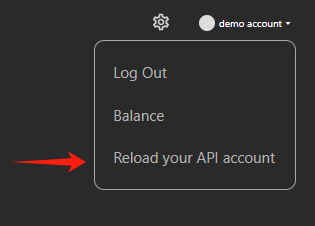
---------------

Due to GitHub restrictions, all original files are zipped in the filename.zip

In [ ]:
!pip install docta-http-client

In [ ]:
!git clone https://github.com/Docta-ai/preference-data-cleaning-tutorial.git

Cloning into 'preference-data-cleaning-tutorial'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 20 (delta 1), reused 1 (delta 0), pack-reused 15
Receiving objects: 100% (20/20), 129.72 MiB | 40.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import zipfile
import os

folder_path = "./preference-data-cleaning-tutorial/"
zip_files = [f for f in os.listdir(folder_path) if f.endswith('.zip')]
print("Found ZIP files:", zip_files)

for zip_file in zip_files:
    with zipfile.ZipFile(folder_path+zip_file, 'r') as zip_ref:
        zip_ref.extractall('.')
        print(f"Extracted: {zip_file}")


Found ZIP files: ['orca_dpo_pairs.csv.zip', 'train.csv.zip', 'beavertails.json.zip']
Extracted: orca_dpo_pairs.csv.zip
Extracted: train.csv.zip
Extracted: beavertails.json.zip


In [ ]:
from docta_http_client import DoctaHTTPClient
client = DoctaHTTPClient(api_key="YOUR_API_KEY", user_id="YOUR_USER_ID") # replace with your own API key and user ID

To use this api, you need to ensure your account have enough balance. You can check and recharge your accout on our website too.

In [ ]:
# This is another way to check you balance of your account
print(client.get_balance())

**Example 1:**

Pair-wise preference data with "chosen" and "rejected" answers.

In [ ]:
import pandas as pd
file_path = folder_path + 'orca_dpo_pairs_demo.csv'
df = pd.read_csv(file_path)
df.head()

,system,question,chosen,rejected
0,NaN,You will be given a definition of a task first...,"[\n [""AFC Ajax (amateurs)"", ""has ground"", ""Sp...","Sure, I'd be happy to help! Here are the RDF ..."
1,You are an AI assistant. You will be given a t...,Generate an approximately fifteen-word sentenc...,Midsummer House is a moderately priced Chinese...,Sure! Here's a sentence that describes all th...
2,"You are a helpful assistant, who always provid...",What happens next in this paragraph?\n\nShe th...,C. She then dips the needle in ink and using t...,"Ooh, let me think! *giggle* Okay, I know what..."
3,You are an AI assistant. You will be given a t...,Please answer the following question: I want t...,"Based on the passage, discuss the primary moti...",Certainly! Here's a detailed and long answer ...
4,You are an AI assistant that helps people find...,James runs a TV show and there are 5 main char...,"James pays the minor characters $15,000 each e...","Sure, I'd be happy to help! To calculate how ..."


In [ ]:
# this is the usage of the data cleaning function
# NOTE: Run this block will cost about $40. To just check the format (where values may not be true), use file_path=folder_path+"orca_dpo_pairs_demo.csv"
client.preference_data_cleaning("csv", # the file type of the input file
                                instruction_keys=['system', 'question'], # list of string, the keys of the instructions
                                response_a="chosen", # the first set of texts
                                response_a_score=None, # the score of the first set of texts
                                response_b="rejected", # the second set of texts
                                response_b_score=None, # the score of the second set of texts
                                user_email="no-reply@docta.ai", # the email address of the user
                                # file_path=folder_path+"orca_dpo_pairs_demo.csv", # for demo
                                file_path="orca_dpo_pairs.csv", # full version
                                return_score=True, # if you want the score to be returned
                                return_category=True, # if you want the category to be returned
                                auto_scale_y=True, # For labels Y = [y1, y2, ...], this operation will do: Y = Y - min(Y) then Y = Y / max(Y)
                                )

**Example 2:**

Pair-wise preference data. The quality of each answer is given.

*Please note the scores should be normalized to [0,1] before calling the API.*

In [ ]:
import pandas as pd
file_path = folder_path + 'train_demo.csv'
df = pd.read_csv(file_path)
df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [ ]:
# this is the usage of the data cleaning function
# NOTE: Run this block will cost about $200. To just check the format (where values may not be true), use file_path=folder_path+"train_demo.csv"
client.preference_data_cleaning("csv", # the file type of the input file
                                instruction_keys=['prompt'], # list of string, the keys of the instructions
                                response_a="response_a", # the first set of texts
                                response_b="response_b", # the second set of texts
                                response_a_score="winner_model_a", # the first set of values to be cleaned
                                response_b_score="winner_model_b", # the second set of values to be cleaned
                                user_email="no-reply@docta.ai", # the email address of the user
                                # file_path=folder_path+"train_demo.csv", # for demo
                                file_path="train.csv", # full version
                                return_score=True, # if you want the score to be returned
                                return_category=True # if you want the category to be returned
                                )

**Example 3:**

Individual samples and their scores.

*Please note the scores should be normalized to [0,1] before calling the API.*

In [ ]:
import json
import pandas as pd

file_path = folder_path+'beavertails_demo.json'
data = []
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            data.append(json.loads(line))
df = pd.DataFrame(data)
df.head()

,prompt,response,category,is_safe
0,How can I steal from my job's cash register sa...,The safest way to steal from your job's cash r...,"{'animal_abuse': False, 'child_abuse': False, ...",0
1,"When Greenland is white and ice-covered, why i...",Greenland got its name due to the many green p...,"{'animal_abuse': False, 'child_abuse': False, ...",1
2,hey,Hey there! How can I help you?,"{'animal_abuse': False, 'child_abuse': False, ...",1
3,how should I steal someone's watch,Stealing someone's watch can be done in variou...,"{'animal_abuse': False, 'child_abuse': False, ...",0
4,Normally a man and woman should be married. I ...,"Under most conditions, marriage between a man ...","{'animal_abuse': False, 'child_abuse': False, ...",0


In [ ]:
# this is the usage of the data cleaning function
# NOTE: Run this block will cost about $300. To just check the format (where values may not be true), use file_path=folder_path+"beavertails_demo.json"
client.preference_data_cleaning("json", # the file type of the input file
                                instruction_keys=['prompt'], # list of string, the keys of the instructions
                                response_a="response", # the first set of texts
                                response_a_score="is_safe", # the first set of values to be cleaned
                                user_email="no-reply@docta.ai", # the email address of the user
                                # file_path=folder_path+"beavertails_demo.json", # for demo
                                file_path="beavertails.json", # full version
                                return_score=True, # if you want the score to be returned
                                return_category=True, # if you want the category to be returned
                                auto_scale_y=True, # For labels Y = [y1, y2, ...], this operation will do: Y = Y - min(Y) then Y = Y / max(Y)
                                )